## Pendefinisian Masalah Interpolasi

Pada bagian sebelumnya, kita telah belajar menggunakan regresi (metode kuadrat terkecil / *least squares*) untuk menemukan parameter fungsi yang paling baik memperkirakan serangkaian titik data tanpa perlu sepenuhnya menyentuh seluruh titik data. Regresi mengasumsikan bahwa kumpulan data memiliki kesalahan pengukuran, dan kita membuat serangkaian parameter model yang meminimalkan kesalahan antara model Anda dan data. Namun, terkadang kita memiliki pengukuran yang diasumsikan sangat dapat diandalkan dan dalam kasus ini kita menginginkan fungsi estimasi yang melewati seluruh titik data tersebut. Dalam definisi yang paling ketat, masalah seperti ini adalah cakupan dari metode interpolasi.

Misalkan kita memiliki kumpulan data yang terdiri dari nilai data independen, $x_i$, dan nilai data dependen, $y_i$, di mana $i = 1,\ldots, n$. Kita ingin menemukan fungsi estimasi $\hat{y}(x)$ sedemikian rupa sehingga $\hat{y}(x_i) = y_i$ untuk setiap titik dalam kumpulan data kita. Ini berarti fungsi estimasi melewati titik-titik data kita. Diberikan $x^{*}$ baru, kita dapat **menginterpolasi** nilai fungsinya menggunakan $\hat{y}(x^{*})$. Dalam konteks ini, $\hat{y}(x)$ disebut **fungsi interpolasi**. Gambar berikut menunjukkan pernyataan masalah interpolasi, dengan tanda tanya adalah suatu nilai yang semestinya dapat didekati oleh $\hat{y}(x^{*})$.

<img src="../img/interpolasi.jpg" alt="Interpolation" title="Illustration of the interpolation problem: estimate the value of a function in between data points." width="200"/>

Tidak seperti kasus regresi, interpolasi tidak mengharuskan kita memiliki model dasar untuk data, terutama ketika ada banyak titik data yang dapat diandalkan/dipercaya. Namun, proses (misalnya proses fisika) yang menghasilkan data tersebut tetap harus memberi tahu kita tentang kualitas interpolasi. Misalnya, data kita mungkin terdiri dari koordinat posisi $x$ pergerakan suatu mobil dari waktu ke waktu $t$. Karena gerak mobil dibatasi oleh hukum-hukum fisika, kita dapat memperkirakan bahwa titik-titik antara koordinat $x$ dalam himpunan kita akan "mulus" dan bukannya bergerigi/patah-patah.

### Contoh kasus

Suatu mobil bergerak pada garis lurus, dengan posisi $x$-nya tercatat pada waktu-waktu $t$ seperti pada tabel.

| Waktu $t$ (s) | Posisi $x$ (m) |
|----------|--------------|
| 0        | 0            |
| 1        | 10           |
| 3        | 35           |
| 4        | 50           |

Kita akan lakukan interpolasi untuk menemukan posisi pada $t = 2$. Ilustrasi titik-titik data ini ditunjukkan di bawah.

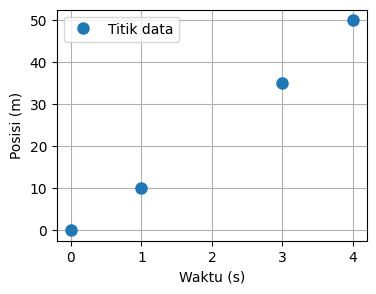

In [21]:
import matplotlib.pyplot as plt

# Titik-titik data
t_pts = [0, 1, 3, 4]
x_pts = [0, 10, 35, 50]

# Plotting
plt.figure(figsize=(4, 3))
plt.plot(t_pts, x_pts, 'o', markersize=8, label='Titik data')
plt.xlabel('Waktu (s)')
plt.ylabel('Posisi (m)')
plt.grid(True)
plt.legend()
plt.show()


## Interpolasi Linear

Interpolasi linier memperkirakan nilai antara dua titik data yang diketahui menggunakan garis lurus.

Misalkan ada dua titik data $(x_0, y_0)$ dan $(x_1, y_1)$, fungsi (berupa polinomial) untuk interpolasinya adalah:
$$
y = a_0 + a_1 x
$$
Kita substitusikan titik-titik yang diketahui ke dalam polinomial untuk membentuk persamaan:
$$
a_0 + a_1 x_0 = y_0 \\
a_0 + a_1 x_1 = y_1
$$
Sistem ini dapat dinyatakan dalam bentuk matriks sebagai:
$$
\begin{bmatrix} 1 & x_0 \\ 1 & x_1 \end{bmatrix} \begin{bmatrix} a_0 \\ a_1 \end{bmatrix} = \begin{bmatrix} y_0 \\ y_1 \end{bmatrix}
$$

Selesaikan sistem persamaan linear ini untuk menemukan koefisien $a_0$ dan $a_1$.


In [23]:
# Interpolasi linear
def linear_interp(x0, y0, x1, y1, x):
    return y0 + ((y1 - y0)/(x1 - x0)) * (x - x0)

# Titik-titik data
t0, x0 = 1, 10
t1, x1 = 3, 35

# Nilai interpolasi untuk t = 2
t = 2
x_linear = linear_interp(t0, x0, t1, x1, t)
print("Posisi hasil interpolasi linear pada at t = 2 adalah", x_linear, "m")

Posisi hasil interpolasi linear pada at t = 2 adalah 22.5 m


## Interpolasi Kuadratik

Interpolasi kuadratik akan memasangkan polinomial kuadrat dengan tiga titik data, yakni $(x_0,y_0)$, $(x_1,y_1)$, and $(x_2,y_2)$. Bentuk polinomialnya:
$$
y = a_0 + a_1 x + a_2 x^2
$$
Substitusikan data-data titik tersebut pada polinomial akan memberikan:
$$
a_0 + a_1 x_0 + a_2 x_0^2 = y_0 \\
a_0 + a_1 x_1 + a_2 x_1^2 = y_1 \\
a_0 + a_1 x_2 + a_2 x_2^2 = y_2
$$
Dalam bentuk matriks, sistem ini menjadi
$$
\begin{bmatrix}
1 & x_0 & x_0^2 \\
1 & x_1 & x_1^2 \\
1 & x_2 & x_2^2
\end{bmatrix}
\begin{bmatrix}
a_0 \\
a_1 \\
a_2
\end{bmatrix}
=
\begin{bmatrix}
y_0 \\
y_1 \\
y_2
\end{bmatrix}
$$

Selesaikan sistem persamaan linear tersebut untuk mendapatkan koefisien-koefisien $a_0, a_1, a_2$, misalnya dengan eliminasi Gauss.

In [24]:
# Interpolasi kuadratik
def quadratic_interp(t_pts, x_pts, t):

    # Inisialisasi matriks
    T = [[1, t_pts[i], t_pts[i]**2] for i in range(3)]
    X = [x_pts[i] for i in range(3)]

    # eliminasi Gauss
    def gauss_elim(A, B):
        n = len(B)
        for i in range(n):
            # Pivot
            max_row = max(range(i, n), key=lambda r: abs(A[r][i]))
            A[i], A[max_row] = A[max_row], A[i]
            B[i], B[max_row] = B[max_row], B[i]

            # Eliminasi
            for j in range(i+1, n):
                ratio = A[j][i]/A[i][i]
                for k in range(i, n):
                    A[j][k] -= ratio * A[i][k]
                B[j] -= ratio * B[i]

        # Substitusi balik
        x = [0]*n
        for i in range(n-1, -1, -1):
            x[i] = (B[i] - sum(A[i][j]*x[j] for j in range(i+1, n))) / A[i][i]
        return x

    coeffs = gauss_elim(T, X)
    a0, a1, a2 = coeffs

    return a0 + a1*t + a2*t**2

# Titik-titik data yang diketahui:
t_pts = [1, 3, 4]
x_pts = [10, 35, 50]

# Posisi hasil interpolasi pada t = 2
x_quad = quadratic_interp(t_pts, x_pts, 2)
print("Posisi hasil interpolasi kuadratik pada at t = 2 adalah", x_quad, "m")

Posisi hasil interpolasi kuadratik pada at t = 2 adalah 21.66666666666667 m


## Metode interpolasi kubik (*cubic spline*)

Metode ini menghubungkan titik-titik data $(x_i, y_i)$ secara kontinu menggunakan turunan pertama dan kedua. Untuk setiap interval $[x_i, x_{i+1}]$, polinomial kubik didefinisikan sebagai
$$
S_i(x) = a_i + b_i(x - x_i) + c_i(x - x_i)^2 + d_i(x - x_i)^3
$$

Kondisi pencocokan kurva yang diperlukan adalah:
- Kontinuitas nilai fungsi:
  $$ S_i(x_{i+1}) = S_{i+1}(x_{i+1}) $$
- Kontinuitas turunan pertama:
  $$ S'_i(x_{i+1}) = S'_{i+1}(x_{i+1}) $$
- Kontinuitas turunan kedua:
  $$ S''_i(x_{i+1}) = S''_{i+1}(x_{i+1}) $$
- Syarat batas:
  $$ S''_0(x_0) = 0 \quad \text{and} \quad S''_{n-1}(x_n) = 0 $$

Kondisi-kondisi di atas pada akhirnya memberikan sistem persamaan matriks linear tridiagonal untuk turunan-turunan kedua, $c_i$:

$$
\begin{bmatrix}
1 & 0 & \dots & 0 \\
h_0 & 2(h_0+h_1) & h_1 & \dots & 0 \\
\dots & \dots & \dots & \dots \\
0 & \dots & h_{n-2} & 2(h_{n-2}+h_{n-1}) & h_{n-1} \\
0 & \dots & 0 & 0 & 1
\end{bmatrix}
\begin{bmatrix}
c_0 \\
c_1 \\
\dots \\
c_{n-1} \\
c_n
\end{bmatrix}
=
\begin{bmatrix}
0 \\
3\frac{y_2 - y_1}{h_1} - 3\frac{y_1 - y_0}{h_0} \\
\dots \\
3\frac{y_n - y_{n-1}}{h_{n-1}} - 3\frac{y_{n-1} - y_{n-2}}{h_{n-2}} \\
0
\end{bmatrix}
$$

Seperti sebelumnya, kita dapat memecahkan sistem persamaan linear ini dengan metode yang sesuai (eliminasi Gauss atau lainnya).

In [25]:
# Interpolasi kubik kombinasi dengan eliminasi Gauss
def cubic_spline_gauss(t_pts, x_pts, t):
    n = len(t_pts) - 1
    h = [t_pts[i+1] - t_pts[i] for i in range(n)]

    # Inisialisasi sistem matriks A*c = B
    size = n + 1
    A = [[0]*size for _ in range(size)]
    B = [0]*size

    # Syarat-syarat batas
    A[0][0] = 1
    A[n][n] = 1
    B[0] = 0
    B[n] = 0

    # Isi matriks A dan vektor B:
    for i in range(1, n):
        A[i][i-1] = h[i-1]
        A[i][i] = 2*(h[i-1] + h[i])
        A[i][i+1] = h[i]
        B[i] = 3*((x_pts[i+1]-x_pts[i])/h[i] - (x_pts[i]-x_pts[i-1])/h[i-1])

    # eliminasi Gauss:
    def gauss_elim(A, B):
        n = len(B)
        # eliminasi atas ke bawah:
        for i in range(n):
            # Pivoting
            max_row = max(range(i, n), key=lambda r: abs(A[r][i]))
            A[i], A[max_row] = A[max_row], A[i]
            B[i], B[max_row] = B[max_row], B[i]

            for j in range(i+1, n):
                ratio = A[j][i]/A[i][i]
                for k in range(i, n):
                    A[j][k] -= ratio*A[i][k]
                B[j] -= ratio*B[i]

        # substitusi balik (bawah ke atas / backward)
        x = [0]*n
        for i in range(n-1, -1, -1):
            sum_ax = sum(A[i][j]*x[j] for j in range(i+1, n))
            x[i] = (B[i] - sum_ax)/A[i][i]
        return x

    # Rumus koefisien interpolasi:
    c_pts = gauss_elim(A, B)

    # Interval interpolasi:
    interval = next(i for i in range(n) if t_pts[i] <= t <= t_pts[i+1])
    hi = h[interval]

    # Koefisien yang dicari pada interval tertentu:
    ai = x_pts[interval]
    bi = (x_pts[interval+1]-x_pts[interval])/hi - hi*(2*c_pts[interval]+c_pts[interval+1])/3
    ci = c_pts[interval]
    di = (c_pts[interval+1]-c_pts[interval])/(3*hi)

    dx = t - t_pts[interval]
    return ai + bi*dx + ci*dx**2 + di*dx**3

# Contoh penggunaan dengan titik-titik data sebelumnya:
t_pts = [0, 1, 3, 4]
x_pts = [0, 10, 35, 50]

# Interpolasi pada t = 2:
x_spline = cubic_spline_gauss(t_pts, x_pts, 2)
print("Posisi hasil interpolasi kubik (spline) pada t = 2 adalah", x_spline, "m")

Posisi hasil interpolasi kubik (spline) pada t = 2 adalah 21.5625 m


### Plot data gabungan

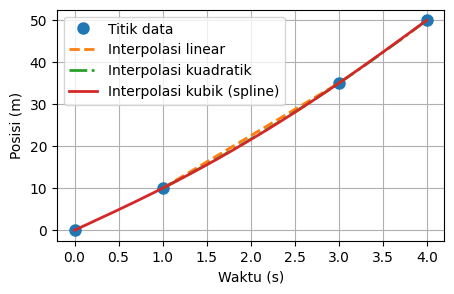

In [27]:
import matplotlib.pyplot as plt

# Titik-titik data
t_pts = [0, 1, 3, 4]
x_pts = [0, 10, 35, 50]

t_values = [i/100 for i in range(0, 401)]  # Nilai t dari 0 hingga 4 dengan peningkatan 0.01
x_linear = [linear_interp(1,10,3,35,t) if 1<=t<=3 else None for t in t_values]
x_quadratic = [quadratic_interp([1,3,4],[10,35,50],t) if 1<=t<=4 else None for t in t_values]
x_cubic = [cubic_spline_gauss(t_pts,x_pts,t) for t in t_values]

# Plot data asli
plt.figure(figsize=(5, 3))
plt.plot(t_pts, x_pts, 'o', markersize=8, label='Titik data')

# Interpolasi linear 
plt.plot([t for t in t_values if 1<=t<=3],
         [x for x in x_linear if x is not None],
         '--', linewidth=2, label='Interpolasi linear')

# Interpolasi kuadratik
plt.plot([t for t in t_values if 1<=t<=4],
         [x for x in x_quadratic if x is not None],
         '-.', linewidth=2, label='Interpolasi kuadratik')

# Interpolasi kubik (spline)
plt.plot(t_values, x_cubic, '-', linewidth=2, label='Interpolasi kubik (spline)')

# Labels and title
plt.xlabel('Waktu (s)')
plt.ylabel('Posisi (m)')
plt.grid(True)
plt.legend()
plt.show()